In [1]:
from pandas import read_csv
from funciones import tipo_transferencia, redondeo, hasta_mil, hasta_10_mil, hasta_100_mil, hasta_un_millon, hasta_10_milllones, barplot

transactions = read_csv("C:\\Users\\palej\\Desktop\\FIUBA\\Organizacion de datos\\TP\\transactions_train.csv")

In [2]:
analisis = transactions[ ["target", "ammount", "product_category", "feat_card_4"] ]

In [3]:
analisis = analisis.rename(columns={"target":"Transaccion", "ammount":"Monto", "product_category":"Tipo de producto", "feat_card_4":"Tarjeta"})

In [4]:
analisis.Transaccion = analisis.Transaccion.map(tipo_transferencia)

In [5]:
analisis.Tarjeta = analisis.Tarjeta.fillna("Otra")

In [6]:
analisis.Monto = analisis.Monto.fillna(0)

In [7]:
analisis.Monto = analisis.Monto.map(redondeo)

In [8]:
analisis = analisis.pivot_table(values="Monto", index="Transaccion", columns=["Tipo de producto", "Tarjeta"], aggfunc=sum)

C:\Users\palej\AppData\Local\Temp\ipykernel_4668\3921862449.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  analisis = analisis.pivot_table(values="Monto", index="Transaccion", columns=["Tipo de producto", "Tarjeta"], aggfunc=sum)


In [9]:
analisis = analisis.fillna(0)

In [10]:
analisis = analisis.unstack().reset_index()

In [11]:
analisis = analisis.rename(columns={0:"Monto en $"})

In [12]:
analisis["Monto hasta mil en $"] = analisis["Monto en $"].map(hasta_mil)

In [13]:
analisis["Monto hasta 10 mil en $"] = analisis["Monto en $"].map(hasta_10_mil)

In [14]:
analisis["Monto hasta 100 mil en $"] = analisis["Monto en $"].map(hasta_100_mil)

In [15]:
analisis["Monto hasta un millon en $"] = analisis["Monto en $"].map(hasta_un_millon)

In [16]:
analisis["Monto hasta 10 millones en $"] = analisis["Monto en $"].map(hasta_10_milllones)

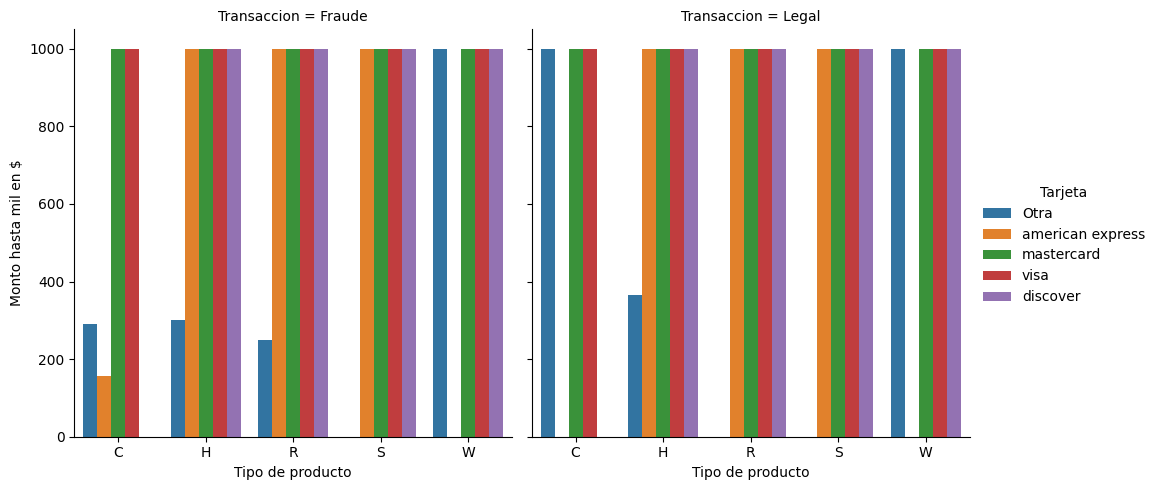

In [17]:
barplot(analisis, "Monto hasta mil en $")

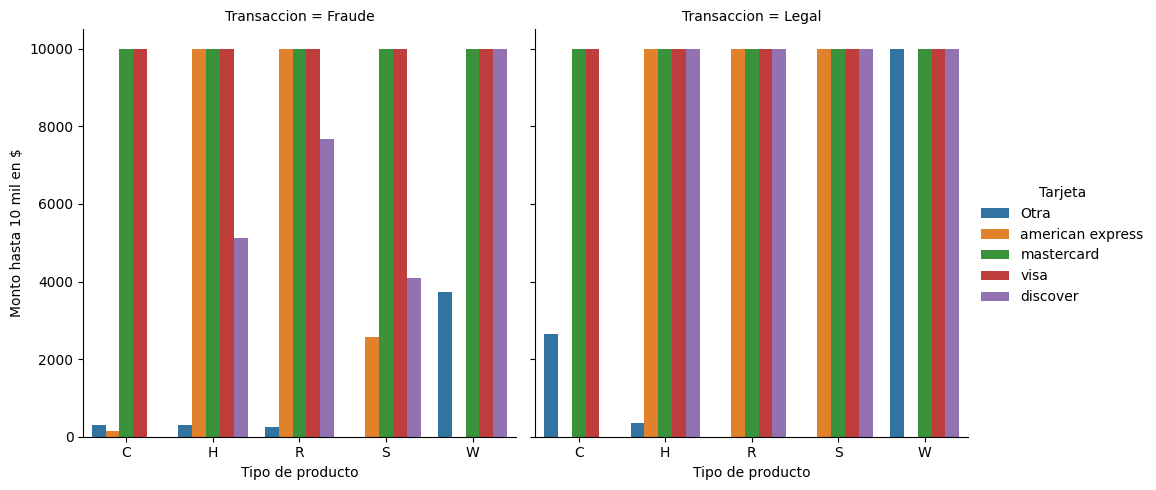

In [18]:
barplot(analisis, "Monto hasta 10 mil en $")

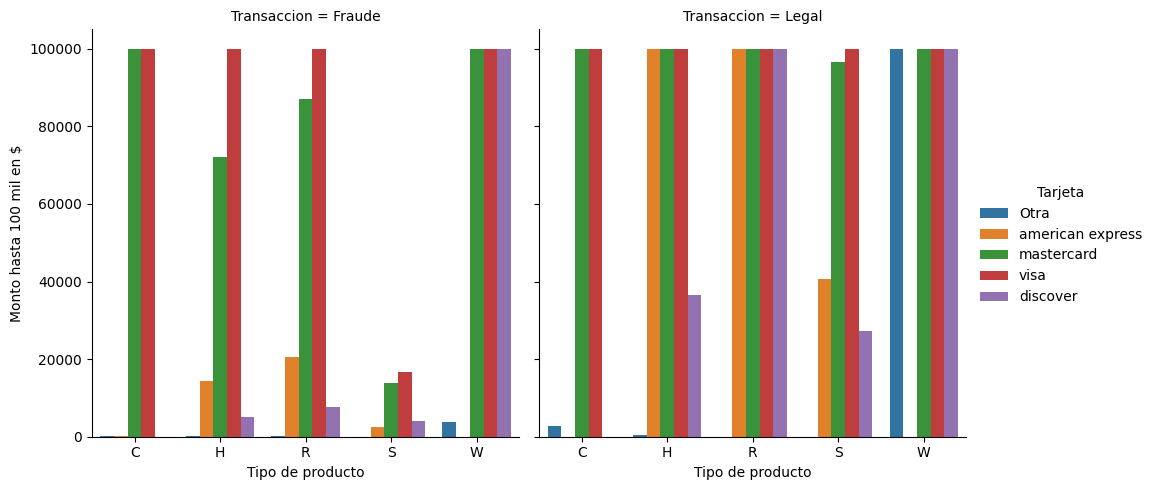

In [19]:
barplot(analisis, "Monto hasta 100 mil en $")

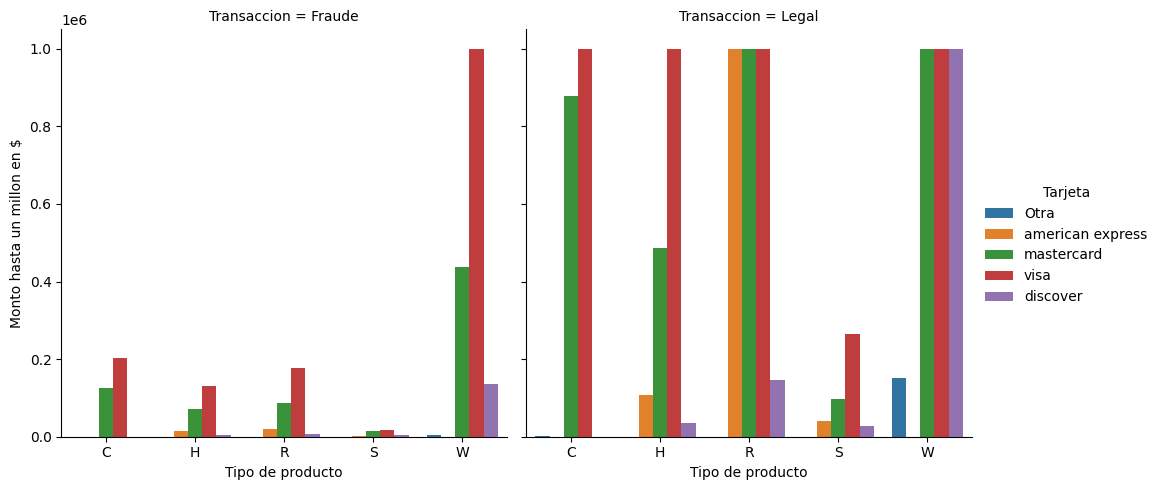

In [20]:
barplot(analisis, "Monto hasta un millon en $")

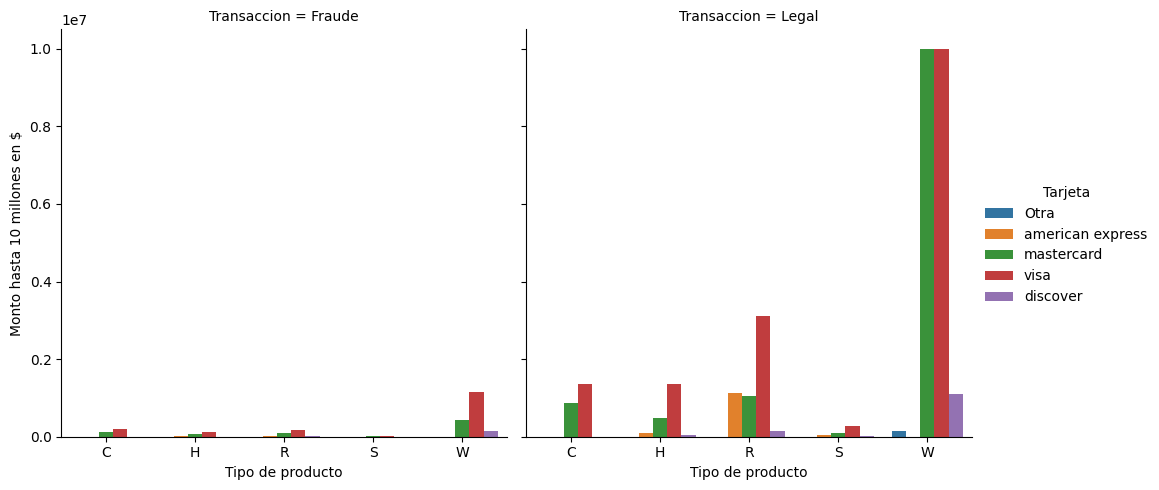

In [21]:
barplot(analisis, "Monto hasta 10 millones en $")

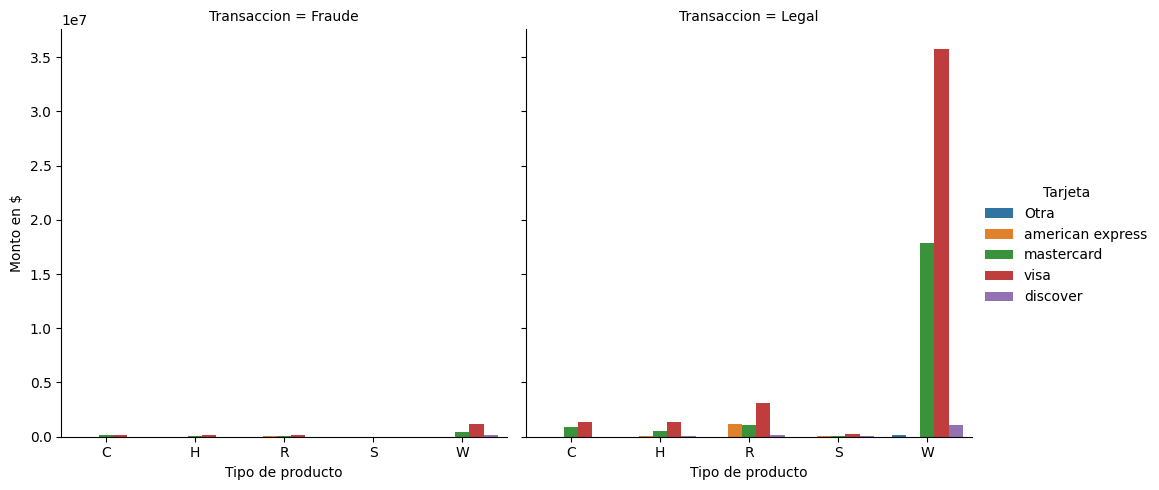

In [22]:
barplot(analisis, "Monto en $")